### Boston 데이터 세팅

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#경고 없애기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#보스턴 집값 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
#DESCR - description 설명 보기
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data = boston['data']
label = boston['target']
columns = boston['feature_names']

In [ ]:
#데이터 프레임 객체로 변환
data = pd.DataFrame(data, columns = columns)
data.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       1

In [ ]:
data.shape

(506, 13)

### Simple Linear Regression

In [ ]:
#하나의 속성(방 개수)만으로 예측

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=2022) 

In [ ]:
#방 개수 = RM
X_train['RM']

256    7.454
288    6.315
318    6.382
136    5.942
233    8.247
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 404, dtype: float64

사이킷런은 2차원 이상의 데이터만 취급한다.  
따라서 위의 데이터를 바로 사용할 수 없다.

In [ ]:
#reshape를 통해 다시 만든다.
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

(행,열)이고 전체 개수를 알 수 없을 경우에는 -1을 하여 준다.  
([:5]는 데이터를 5개만 출력하여 결과를 보기위해 붙여준다.)

In [ ]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [ ]:
#학습하기
sim_lr.fit(X_train['RM'].values.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
#예측 결과 출력
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))

#### 결과 분석

In [ ]:
#결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2: 0.2121


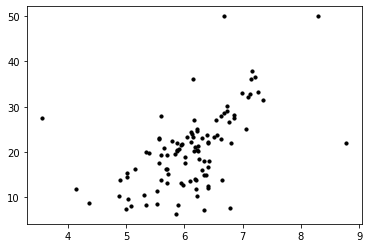

In [ ]:
#결과 시각화 하기
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')

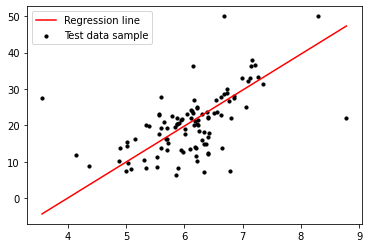

In [ ]:
plt.scatter(X_test['RM'], y_test, s=10, c='black')
# 선 추가
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line','Test data sample'], loc='upper left')

### Multiple Linear Regression

In [ ]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)     #X_train으로 모든 속성을 사용

LinearRegression()

In [ ]:
y_pred = mul_lr.predict(X_test)
print('다중 선현 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선현 회귀, R2: 0.6226


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 5)

트리가 몇 단계까지 내려갈지 max_depth를 통하여 설정한다  
실제로 코딩하면 재귀호출 형태를 띈다.

In [ ]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [ ]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.3247


단계를 4로 하면 0.3474
단계를 7로 하면 0.3164

오버피팅 현상이 발생한다.